In [92]:
import matplotlib.pyplot as plt
import numpy as np
import ee
import pandas as pd
ee.Initialize()

In [98]:
# Init params
landsat = ee.ImageCollection("LANDSAT/LC8_L1T_8DAY_NDVI")
years = [x for x in range(2013, 2016)]
area = (ee.FeatureCollection('ft:1Lhpvhw2Xea1VpyTQdKXM5K8uVcxKXT3OjCtmfXAi').filter(ee.Filter().eq('COUNTY num', 199)))

In [100]:
# # Optionally define an area by specifying a polygon
# area = ee.Geometry.Polygon(
#          [[[-98.51749420166016, 37.921722001139806],
#            [-98.5202407836914, 37.790794553924435],
#            [-98.31047058105469, 37.790794553924414],
#            [-98.3060073852539, 37.92009699991215]]])

In [101]:
# import the RS products
ls = ee.ImageCollection("LANDSAT/LC8_L1T_8DAY_NDVI")

# Define time range
startyear = 2015
endyear = 2016
 
# create list for years
years = range(startyear,endyear);
 
# make a list with months
months = range(7,8);
 
# Set date in ee date format
startdate = ee.Date.fromYMD(startyear,1,1)
enddate = ee.Date.fromYMD(endyear+1,12,31)
 
# Filter chirps
filtered = ls.filterDate(startdate, enddate).sort('system:time_start', False).select("NDVI")
 
# calculate the monthly mean
def calcMonthlyMean(imageCollection):
    mylist = ee.List([])
    for y in years:
        for m in months:
            w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).mean();
            mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
    return ee.ImageCollection.fromImages(mylist)
 
# run the calcMonthlyMean function
monthly = ee.ImageCollection(calcMonthlyMean(filtered))
 
# select the region of interest, 30 is the cellsize in meters
monthly = monthly.getRegion(area,100,"epsg:4326").getInfo()


In [102]:
s = df_from_ee_object(monthly)

In [103]:
a = array_from_df(s, "NDVI")

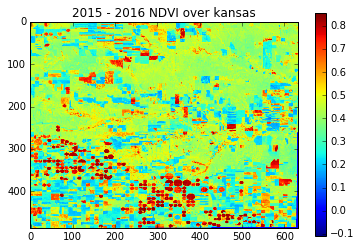

In [105]:
plt.imshow(a)
plt.colorbar()
plt.title("2015 - 2016 NDVI over kansas")
plt.show()